In [1]:
# Import the relevant modules
import os
import sys
import glob

# Import third party modules
import numpy as np
import xarray as xr
# import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import dictionaries_em as dicts

In [3]:
sys.path.append("/home/users/benhutch/energy-met-corr-functions")

# Import the functions
import functions_em as funcs

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [4]:
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as other_dicts

In [5]:
import importlib

importlib.reload(funcs)

<module 'functions_em' from '/home/users/benhutch/energy-met-corr-functions/functions_em.py'>

### Aggregate onshore wind correlations ###

### Solar correlations ###

Looking at correlations between climate indices (solar irradiance, NAO, delta P) and countrywide solar power generation from the CLEARHEADS data.

The data we want is in:

* *NUTS_0_sp_historical.nc* - Hourly area-averaged solar power capacity factors at NUTS0 level across Europe from 1950 to 2020.
* *NUTS_0_sp_historical_loc_weighted.nc* - Hourly solar power capacity factors at NUTS0 level across Europe, from 01/01/1950 - 31/12/2020. Data is weighted by the location of known solar panels from Dunnett et al., (2020) and Stowell et al., (2020) for the UK.
    * This dataset appears to be buggy, use the former.

In [6]:
# Ste up the model config
# Set up the model config
# rsds_global_ONDJFM_2-9_1961_2014_4_Spain_nao_matched.csv
# /rsds_global_ONDJFM_2-9_1964_2014_4_Spain_nao_matched.csv
# model_config = {
#     "variable": "rsds",
#     "season": "ONDJFM",
#     "region": "global",
#     "start_year": 1961,
#     "end_year": 2014,
#     "forecast_range": "2-9",
#     "lag": 4,
#     "gridbox": "Spain",
#     "method": "nao_matched",
# }

# # # # rsds_global_ONDJFM_2-9_1961_2014_4_West Mediterranean_nao_matched.csv
model_config = {
    "variable": "psl",
    "season": "ONDJFM",
    "region": "global",
    "nao": "thornton_2019",
    # "nao": "nao_default",
    "start_year": 1961,
    "end_year": 2014,
    "forecast_range": "2-9",
    "lag": 4,
    "method": "alternate_lag",
}

# file="NUTS_0_t2m_detrended_timeseries_historical_pop_weighted.nc",
# shp_file="NUTS_RG_10M_2021_4326.shp",
# shp_file_dir="/home/users/benhutch/shapefiles/NUTS/",
# label="Pop. weighted temp (K)",
# trend_level=2020.0,
# tas_global_ONDJFM_2-9_1961_2014_4_UK_grid_nao_matched.csv

# # model config for 10m wind speeds
# model_config = {
#     "variable": "sfcWind",
#     "season": "ONDJFM",
#     "region": "global",
#     "start_year": 1961,
#     "end_year": 2014,
#     "forecast_range": "2-9",
#     "lag": 4,
#     "gridbox": "North Europe Grid",
#     "method": "nao_matched",
# }

# ~/shapefiles/NUTS/NUTS_RG_10M_2021_4326.shp

# NUTS_0_wp_ons_sim_1_historical_loc_weighted.n
# weighted by location of known and proposed future wind farms
# gws/nopw/j04/canari/users/benhutch/nao_stats_df/tas_global_ONDJFM_2-9_1961_2014_4_UK_grid_nao_matched.csv
# /gws/nopw/j04/canari/users/benhutch/nao_stats_df/psl_ONDJFM_global_1961_2014_2-9_4_nao_default.csv

# Call the function
# TODO: onshore wind correlations
dfs_model_pr = funcs.correlate_nao_uread(
    filename="EEZ_zones_wp_historical.nc",
    # nao_n_grid=dicts.uk_n_box_corrected,
    # nao_s_grid=dicts.uk_s_box_corrected,
    # obs_var="ssrd",
    # avg_grid=other_dicts.med_box_focus,
    use_model_data=True,
    model_config=model_config,
)

# use_model_data=True,
# model_config=model_config,

NUTS_keys for UREAD data:  ['ES' 'NO' 'UK' 'IE' 'FI' 'SE' 'BE' 'NL' 'DE' 'DK' 'PO' 'FR' 'IT' 'PT'
 'EE' 'LI' 'LV' 'HR' 'RO' 'SI' 'GR' 'TR' 'MT' 'AL' 'BG']


/home/users/benhutch/energy-met-corr-functions/functions_em.py:2119: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()
/home/users/benhutch/energy-met-corr-functions/functions_em.py:2132: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df = df.resample("A").mean()
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Extracting the stored NAO data from the model data.
Filepath:  /gws/nopw/j04/canari/users/benhutch/nao_stats_df/psl_ONDJFM_global_1961_2014_2-9_4_thornton_2019.csv
Filepath:  /gws/nopw/j04/canari/users/benhutch/nao_stats_df/psl_ONDJFM_global_1961_2014_2-9_4_thornton_2019.csv
Head of merged_df:              init_time    obs_nao  model_nao_mean  model_nao_members_min  \
valid_time                                                                
1969             1964 -190.44958     -232.656768            -318.234643   
1970             1965 -110.93028     -192.618070            -278.195945   
1971             1966 -105.87212     -173.565836            -259.143711   
1972             1967 -114.52344      -75.626209            -161.204084   
1973             1968  -44.35204      -47.700463            -133.278338   

            model_nao_members_max  NAO anomaly (Pa)  
valid_time                                           
1969                  -147.078892       -348.860190  
1970            

/home/users/benhutch/energy-met-corr-functions/functions_em.py:2360: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_df = pd.concat([corr_df, corr_df_to_append], ignore_index=True)
/home/users/benhutch/energy-met-corr-functions/functions_em.py:2352: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(merged_df_full[col], merged_df_full["model_nao_mean"])


In [7]:
# dfs_obs_pr = funcs.correlate_nao_uread(
#     filename="NUTS_0_sp_historical.nc",
#     obs_var="var228",
#     obs_var_data_path=dicts.regrid_file_pr,
#     avg_grid=dicts.scandi_box,
# )


In [7]:
len(dfs_model_pr)

4

In [8]:
_, _, merged_df_delta_p, _ = dfs_model_pr

In [9]:
merged_df_pr_obs, _ = dfs_model_pr

In [9]:
_, _, merged_df_nao_obs, _ = dfs_model_pr

In [10]:
merged_df_pr, _ = dfs_obs_pr

In [14]:
merged_df_nao_obs = merged_df_delta_p

In [9]:
merged_df_delta_p.head()

,ES,NO,UK,IE,FI,SE,BE,NL,DE,DK,...,TR,MT,AL,BG,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa)
1969,0.479308,0.596545,0.632529,0.669339,0.507176,0.502812,0.559584,0.589325,0.585457,0.574637,...,0.359215,0.268669,0.306626,0.433071,1964,-354.681580,-267.841253,-439.194590,-96.487916,-348.860190
1970,0.471208,0.604410,0.633036,0.663770,0.511924,0.506810,0.559825,0.591133,0.589240,0.578829,...,0.356709,0.265259,0.302343,0.434992,1965,-215.043700,-276.476331,-447.829668,-105.122993,-209.222450
1971,0.464521,0.600180,0.629490,0.661817,0.509798,0.508777,0.560630,0.588997,0.587965,0.578268,...,0.357817,0.262860,0.299072,0.434915,1966,-203.877410,-284.130047,-455.483384,-112.776710,-198.056168
1972,0.459356,0.601871,0.629018,0.660132,0.509214,0.506293,0.549163,0.584647,0.583611,0.570343,...,0.357566,0.258505,0.294513,0.434485,1967,-147.214690,-191.507105,-362.860442,-20.153768,-141.393485
1973,0.463380,0.601826,0.627399,0.656625,0.512376,0.511089,0.548515,0.582105,0.582596,0.570671,...,0.354671,0.262653,0.299943,0.429336,1968,-3.761232,-181.768159,-353.121496,-10.414822,2.060024


In [13]:
merged_df_pr_obs = merged_df_pr_obs[["NAO anomaly (Pa)"]]

In [16]:
merged_df_nao_obs = merged_df_nao_obs[["model_nao_mean"]]

In [17]:
merged_df_pr = merged_df_pr[["var228 anomaly mean"]]

In [18]:
# # convert index to years
merged_df_pr.index = merged_df_pr.index.year

In [16]:
merged_df_pr_obs.head()

,NAO anomaly (Pa)
1964-12-31,-266.864058
1965-12-31,-402.506399
1966-12-31,-396.282283
1967-12-31,-311.324456
1968-12-31,-261.748606


In [14]:
merged_df_nao_obs.index = merged_df_nao_obs.index.year

AttributeError: 'Index' object has no attribute 'year'

In [19]:
merged_df_nao_obs.head()

,model_nao_mean
1969,-232.656768
1970,-192.618070
1971,-173.565836
1972,-75.626209
1973,-47.700463


In [20]:
merged_df = merged_df_nao_obs.join(merged_df_pr, how="outer")

In [21]:
merged_df.head()

,model_nao_mean,var228 anomaly mean
1964,NaN,-0.000112
1965,NaN,-0.000151
1966,NaN,-0.000194
1967,NaN,-0.000127
1968,NaN,-0.000073


In [22]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df.head()

In [ ]:
merged_df_pr.head()

In [ ]:
merged_df_pr = merged_df_pr[["var228 anomaly mean"]]

In [ ]:
merged_df_delta_p.head()

In [ ]:
# restrict to the "NAO anomaly (Pa)" column
merged_df_NAO = merged_df_delta_p[["model_nao_mean"]]

In [ ]:
merged_df_NAO.head()

In [14]:
merged_df_pr_obs.head()

,NAO anomaly (Pa)
1964,-266.864058
1965,-402.506399
1966,-396.282283
1967,-311.324456
1968,-261.748606


In [ ]:
# join the two dataframes
merged_df_full = merged_df.join(merged_df_pr)

In [ ]:
merged_df_full.head()

In [ ]:
df, df_model, merged_df, corr_df = dfs

In [ ]:
merged_df_full.head()

In [ ]:
# # restrict merged_df to the index, fcst_ts_mean and obs_ts and UK
# merged_df_subset = merged_df[[
#     "fcst_ts_mean",
#     "obs_ts",
#     "UK",
# ]]

In [ ]:
# merged_df_subset.head()

In [9]:
# path to file
path = "/home/users/benhutch/energy-sotcr-2023/data/ERA5_wd_demand_UK_1940_2023_daily.csv"

# open the file
demand_df = pd.read_csv(path)

In [10]:
demand_df.head()

,Unnamed: 0,United_Kingdom
0,1940-01-01,47.228293
1,1940-01-02,47.953306
2,1940-01-03,47.568234
3,1940-01-04,46.787436
4,1940-01-05,46.914110


In [11]:
# process the data
demand_df["date"] = pd.to_datetime(demand_df["Unnamed: 0"])

# set the date as the index
demand_df.set_index("date", inplace=True)

# drop the unnamed column
demand_df.drop("Unnamed: 0", axis=1, inplace=True)

In [12]:
# resample into monthly means
demand_monthly = demand_df.resample("M").mean()

# Select only the period of interest
demand_monthly = demand_monthly.loc["1960-01-01":"2023-12-31"]

# Select the months of interest
demand_monthly = demand_monthly[demand_monthly.index.month.isin([10, 11, 12, 1, 2, 3])]

# shift by the annual offset
demand_monthly.index = demand_monthly.index - pd.DateOffset(months=3)

# Throw away the first 3 months and the last 3 months
demand_monthly = demand_monthly[3:-3]

# Calculate the annual average
demand_annual = demand_monthly.resample("Y").mean()

# Take the rolling mean
demand_rolling = demand_annual.rolling(window=8, center=True).mean()

# throw away the NaN values
demand_rolling = demand_rolling.dropna()

/tmp/ipykernel_114706/3076350266.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  demand_monthly = demand_df.resample("M").mean()
/tmp/ipykernel_114706/3076350266.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  demand_annual = demand_monthly.resample("Y").mean()


In [13]:
# rename United_Kingdom to UK_wd_demand
demand_rolling.rename(columns={"United_Kingdom": "UK_wd_demand"}, inplace=True)

In [14]:
demand_rolling.head()

,UK_wd_demand
date,
1964-12-31,43.230090
1965-12-31,43.320959
1966-12-31,43.270491
1967-12-31,42.985160
1968-12-31,42.864759


In [15]:
merged_df_delta_p.head()

,ES,NO,UK,IE,FI,SE,BE,NL,DE,DK,...,TR,MT,AL,BG,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa)
1969,0.479308,0.596545,0.632529,0.669339,0.507176,0.502812,0.559584,0.589325,0.585457,0.574637,...,0.359215,0.268669,0.306626,0.433071,1964,-190.44958,-232.656768,-318.234643,-147.078892,-348.860190
1970,0.471208,0.604410,0.633036,0.663770,0.511924,0.506810,0.559825,0.591133,0.589240,0.578829,...,0.356709,0.265259,0.302343,0.434992,1965,-110.93028,-192.618070,-278.195945,-107.040195,-209.222450
1971,0.464521,0.600180,0.629490,0.661817,0.509798,0.508777,0.560630,0.588997,0.587965,0.578268,...,0.357817,0.262860,0.299072,0.434915,1966,-105.87212,-173.565836,-259.143711,-87.987961,-198.056168
1972,0.459356,0.601871,0.629018,0.660132,0.509214,0.506293,0.549163,0.584647,0.583611,0.570343,...,0.357566,0.258505,0.294513,0.434485,1967,-114.52344,-75.626209,-161.204084,9.951667,-141.393485
1973,0.463380,0.601826,0.627399,0.656625,0.512376,0.511089,0.548515,0.582105,0.582596,0.570671,...,0.354671,0.262653,0.299943,0.429336,1968,-44.35204,-47.700463,-133.278338,37.877413,2.060024


In [18]:
# merged_df_NAO.index = merged_df_NAO.index.year

In [16]:
# # Set the index of the demand_rolling to be the date in years + 5
# demand_rolling.index = demand_rolling.index

# set just as the years
demand_rolling.index = demand_rolling.index.year

In [17]:
# join the two dataframes: merged_df and demand_rolling
combined_df = merged_df_delta_p.join(demand_rolling)

In [20]:
combined_df.tail()

,ES,NO,UK,IE,FI,SE,BE,NL,DE,DK,...,MT,AL,BG,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa),UK_wd_demand
2012,0.490726,0.603273,0.643905,0.675779,0.510451,0.513196,0.573535,0.603641,0.605228,0.595182,...,0.277856,0.312737,0.400389,2007,106.285355,67.397110,-103.956227,238.750448,112.106514,42.250484
2013,0.485402,0.601297,0.641389,0.675083,0.514657,0.519326,0.573276,0.602187,0.605833,0.602807,...,0.269904,0.303107,0.403990,2008,99.095215,92.429134,-78.924203,263.782471,104.916430,42.147662
2014,0.478886,0.604653,0.648024,0.683523,0.519348,0.524931,0.578008,0.610422,0.610774,0.607185,...,0.268696,0.302761,0.405260,2009,304.265560,77.570512,-93.782825,248.923849,310.086815,42.086073
2015,0.475959,0.606809,0.654180,0.697309,0.522075,0.525278,0.580059,0.619688,0.618699,0.611076,...,0.268292,0.302305,0.411148,2010,410.259770,80.135280,-91.218057,251.488617,416.080925,41.900022
2016,0.487452,0.597755,0.654373,0.700250,0.525837,0.529399,0.592176,0.624618,0.619145,0.609771,...,0.269437,0.304741,0.413669,2011,356.181030,92.556676,-78.796661,263.910013,362.002204,41.981077


In [23]:
# throw away all columns apart from the UK_wd_demand and "t2m anomaly mean"
combined_df_subset = combined_df[["UK_wd_demand", "model_nao_mean"]]

# # throw away all columns apart from the NAO anomaly (Pa) and "UK_wd_demand"
# combined_df_subset = combined_df[["UK_wd_demand", "NAO anomaly (Pa)"]]

In [24]:
combined_df_subset.head()

,UK_wd_demand,model_nao_mean
1969,42.727389,-267.841253
1970,42.623879,-276.476331
1971,42.592295,-284.130047
1972,42.543972,-191.507105
1973,42.535026,-181.768159


In [ ]:
# Convert the 'date' column to datetime format
demand_df['date'] = pd.to_datetime(demand_df['date'])

# Extract the year and set it as the index
demand_df['year'] = demand_df['date'].dt.year
demand_df.set_index('year', inplace=True)

In [ ]:
demand_df = demand_df.drop('date', axis=1)

In [ ]:
demand_df = demand_df.dropna()

In [ ]:
# join the dataframes
merged_df = merged_df_subset.join(demand_df, how='left')

In [ ]:
merged_df.head()

In [ ]:
# restrict to NAO anomaly (Pa) column
merged_df = merged_df["UK"]

In [ ]:
merged_df.head()

In [ ]:
# Convert the Series to a DataFrame
merged_df = merged_df.to_frame()

# Reset the index
merged_df.reset_index(inplace=True)

In [ ]:
# save the file
# # output directory
output_dir = "/home/users/benhutch/NGrid_demand/csv_files"

# output filename
output_fname = "obs_UK_historical_temp_detrend_0.csv"

# Save as a csv file
# save the dataframe to a .csv file
merged_df.to_csv(os.path.join(output_dir, output_fname), index=False)

In [ ]:
# df, merged_df, merged_df_full, corr_df = dfs

In [ ]:
# merged_df_hdd = merged_df_full

In [ ]:
# merged_df_hdd.head()

In [ ]:
# dfs_ofs_wind = funcs.correlate_nao_uread(
#     filename="EEZ_zones_wp_historical.nc",
#     nao_n_grid=dicts.uk_n_box_corrected,
#     nao_s_grid=dicts.uk_s_box_corrected,
#     use_model_data=True,
#     model_config=model_config,
# )

In [ ]:
# len(dfs_ofs_wind)

In [ ]:
# _, _, merged_df_full, _ = dfs_ofs_wind

In [ ]:
# # Combine these two datasets together
# # HDD - offshore wind
# # add suffixes
# merged_df_hdd = merged_df_hdd.add_suffix("_HDD")
# merged_df_wind = merged_df_full.add_suffix("_ofs_wind")

In [ ]:
# # join the two dataframes
# hdd_wind = merged_df_hdd.join(merged_df_wind)

In [ ]:
# hdd_wind.columns

In [ ]:
# # Create a new dataframe
# demand_net_wind = pd.DataFrame()

# # Loop over the columns
# for column in hdd_wind.columns:
#     if column.endswith('_HDD'):
#         country_code = column[:2]  # Get the country code
#         if f"{country_code}_ofs_wind" in hdd_wind.columns:
#             # Standardize the columns before taking the difference
#             hdd_standardized = (hdd_wind[column] - hdd_wind[column].mean()) / hdd_wind[column].std()
#             ofs_wind_standardized = (hdd_wind[f"{country_code}_ofs_wind"] - hdd_wind[f"{country_code}_ofs_wind"].mean()) / hdd_wind[f"{country_code}_ofs_wind"].std()
            
#             demand_net_wind[f'{country_code}_diff'] = hdd_standardized - ofs_wind_standardized

In [ ]:
# demand_net_wind.head()

In [ ]:
# demand_net_wind["model_NAO_anomaly_(hPa)"] = hdd_wind['model_nao_mean_ofs_wind']

In [ ]:
# from scipy.stats import pearsonr

# # Create an empty list to store the data
# data = []

# # Loop over the columns
# for column in demand_net_wind.columns:
#     if column.endswith('_diff'):
#         # Extract the country code
#         country_code = column[:2]

#         if not demand_net_wind[column].isna().any():
#             # Calculate the correlation and p-value
#             corr, p_value = pearsonr(demand_net_wind[column], demand_net_wind['model_NAO_anomaly_(hPa)'])
        
#             # Append the results to the data list
#             data.append([country_code, corr, p_value])
#         else:
#             data.append([country_code, np.nan, np.nan])

# # Convert the data list to a dataframe
# diff_cor_df = pd.DataFrame(data, columns=['Country Code', 'Correlation', 'P-Value'])

In [ ]:
# hdd_wind.head()

In [ ]:
# diff_cor_df

In [ ]:
# # Rename the columns
# corr_df = corr_df.rename(columns={
#     "correlation": "correlation_(hc_nao, onshore_cfs)",
#     "p-value": "p-value_(hc_nao, onshore_cfs)"
# })

In [ ]:
# demand_net_wind.head()

In [ ]:
# Process the data but using delta P instead of the NAO index

In [ ]:
# nao_df_dir = "/gws/nopw/j04/canari/users/benhutch/nao_stats_df/"
# nao_df_fname = "psl_ONDJFM_global_1961_2014_2-9_4_nao_default.csv"

# # # Set up the model config
# # model_config = {
# #     "variable": "psl",
# #     "season": "ONDJFM",
# #     "region": "global",
# #     "start_year": 1961,
# #     "end_year": 2014,
# #     "forecast_range": "2-9",
# #     "lag": 4,
# #     "nao": "thornton_2019_uk",
# # }

# # Set up the model config
# model_config = {
#     "variable": "psl",
#     "season": "ONDJFM",
#     "region": "global",
#     "start_year": 1961,
#     "end_year": 2014,
#     "forecast_range": "2-9",
#     "lag": 4,
#     "nao": "thornton_2019_uk",
#     "gridbox": "Scandinavia",
#     "method": "nao_matched",
# }


# # EEZ_zones_wp_historical.nc
# # NUTS_0_HDD_historical_pop_weighted.nc
# # test the other function for doing this
# # days for cooling degree days
# df, merged_df, merged_df_full, corr_df = funcs.correlate_nao_uread(
#     filename="NUTS_0_HDD_historical_pop_weighted.nc",
#     time_unit="d",
#     obs_var="msl",
#     avg_grid=dicts.scandi_box,
#     use_model_data=True,
#     model_config=model_config,
# )

In [ ]:
# calib_df = funcs.calc_model_nao_gridbox_var_corr(
#     nao_df=merged_df_full,
#     gridbox=dicts.med_box_focus,
#     obs_var="ssrd",
#     obs_var_data_path=dicts.regrid_file,
#     coeff_fname="obs_nao_obs_solar_cfs_slope.csv",
# )

In [ ]:
# calib_df.head()

In [ ]:
# # reload the functions
# import importlib

# importlib.reload(funcs)

In [ ]:
# # Test the plotting function
# funcs.plot_calib_corr(
#     df=calib_df,
#     predictand_var="ES",
#     index_name="Calibrated NAO (hPa)",
#     ylabel="Spain solar CF.'s (GW)",
#     zero_line=False,
# )

In [ ]:
# # Plot the calibrated_model_nao_mean against the var228 anomaly mean
# # with seperate y-axes
# from scipy.stats import pearsonr

# # Create a new figure and an axes
# fig, ax1 = plt.subplots()

# # Plot the calibrated_model_nao_mean on the first y-axis
# ax1.plot(df.index, df["calibrated_model_nao_mean"], color="blue", label="nao")
# ax1.set_ylabel("pr anomalies (mm/day)")
# # Plot the var228 anomaly mean on the second y-axis
# ax1.plot(df.index, df["var228 anomaly mean"], color="red", label="var228")

# # show the correlation coefiients
# corr, p = pearsonr(df["calibrated_model_nao_mean"], df["var228 anomaly mean"])

# # Include a textbox in the top left hand corner with the corr and p values
# plt.text(
#     0.05,
#     0.95,
#     f"Corr: {round(corr, 2)}\n p-value: {round(p, 2)}",
#     horizontalalignment="left",
#     verticalalignment="top",
#     transform=plt.gca().transAxes,
#     bbox=dict(facecolor="white", alpha=0.5),
# )

# # Include a horixzontal black dashed line at y=0
# plt.axhline(0, color="black", linestyle="--")

# # Include a legend
# plt.legend(loc="upper right")

# # Show the plot
# plt.show()

In [ ]:
# print(f"{p:.2f}")

In [ ]:
# Testing the NUTS shapefiles
# Load in the shapefile fo the eez data
NUTS_shapefile = gpd.read_file("~/shapefiles/NUTS/NUTS_RG_10M_2021_4326.shp")

# Restrict to level code 0
NUTS_shapefile = NUTS_shapefile[NUTS_shapefile.LEVL_CODE == 0]

# Extract the second element of the tuple
countries_codes = list(dicts.countries_nuts_id.values())

# Limit the gpd to the countries in the dictionary
NUTS_shapefile = NUTS_shapefile[NUTS_shapefile.NUTS_ID.isin(countries_codes)]

# Keep only the NUTS_ID, NUTS_NAME, and geometry columns
NUTS_shapefile = NUTS_shapefile[["NUTS_ID", "NUTS_NAME", "geometry"]]

In [ ]:
NUTS_shapefile.head()

In [ ]:
corr_df.head()

In [ ]:
# Load in the shapefile fo the eez data
EEZ_shapefile = gpd.read_file("~/shapefiles/EEZ/eez_v12.shp")

In [ ]:
EEZ_shapefile.head()

In [ ]:
# # Print all of the column names for the eeZ shapefile
# print(EEZ_shapefile.columns)

In [ ]:
# Throw away all of the columns, apart from "GEONAME", 'SOVEREIGN1',
# "ISOSOV1", "geometry"
EEZ_shapefile = EEZ_shapefile[["GEONAME", "SOVEREIGN1", "ISO_SOV1", "geometry"]]

In [ ]:
EEZ_shapefile.head()

In [ ]:
iso_sov1 = EEZ_shapefile["ISO_SOV1"].values

In [ ]:
iso_sov1

In [ ]:
# Extract the values of the region column from corr_df
region_values = corr_df.region.values

In [ ]:
region_values

In [1]:
# reload the dictionary
importlib.reload(dicts)

NameError: name 'importlib' is not defined

In [ ]:
# Convert the region values to equivalent iso_sov1 values
# using the mapping in the dictionary
iso_sov1_values = [dicts.iso_mapping[region] for region in region_values]

In [ ]:
iso_sov1_values

In [ ]:
# Constrain the geo dataframe to only include the iso_sov1 values
EEZ_shapefile = EEZ_shapefile[EEZ_shapefile["ISO_SOV1"].isin(iso_sov1_values)]

In [ ]:
# Find where ISO_SOV1 is equal to "ITA"
EEZ_shapefile.head()

In [ ]:
# Where corr_df.region passed through iso_mapping dict is
# equal to the values in EEZ_shapefile.ISO_SOV1
# Add the corresponding correlation and p-value to the dataframe

In [ ]:
# Filter df to only include the rows where GEONAME includes: "Exclusive Economic Zone"
EEZ_shapefile = EEZ_shapefile[
    EEZ_shapefile["GEONAME"].str.contains("Exclusive Economic Zone")
]

In [ ]:
EEZ_shapefile.head()

In [ ]:
# Now we want to append the correlation and p-value to the dataframe
# Add a new column to corr_df called "ISO_SOV1"
corr_df["ISO_SOV1"] = iso_sov1_values

In [ ]:
corr_df["region"] == "EL"

In [ ]:
# Loop over the columns in EEZ_shapefile and add the correlation and p-value
# where the ISO_SOV1 values are equal
for index, row in EEZ_shapefile.iterrows():
    # Extract the ISO_SOV1 value
    iso_sov1 = row["ISO_SOV1"]
    # Find the index of the row in corr_df that matches the ISO_SOV1
    index_corr = corr_df[corr_df["ISO_SOV1"] == iso_sov1].index
    # Add the correlation and p-value to the dataframe
    EEZ_shapefile.loc[index, "correlation"] = corr_df.loc[
        index_corr, "correlation"
    ].values
    EEZ_shapefile.loc[index, "p-value"] = corr_df.loc[index_corr, "p-value"].values

In [ ]:
# Same thing for the NUTS_shapefile
for index, row in NUTS_shapefile.iterrows():
    # Extract the NUTS_ID value
    nuts_id = row["NUTS_ID"]

    # Find the index of the row in corr_df that matches the NUTS_ID
    index_corr = corr_df[corr_df["region"] == nuts_id].index

    if len(index_corr) == 0:
        print(f"No match found for {nuts_id}")
        continue

    # Add the correlation and p-value to the dataframe
    NUTS_shapefile.loc[index, "correlation"] = corr_df.loc[
        index_corr, "correlation"
    ].values

    NUTS_shapefile.loc[index, "p-value"] = corr_df.loc[index_corr, "p-value"].values

In [ ]:
EEZ_shapefile.head()

In [ ]:
NUTS_shapefile.head()

In [ ]:
# Remove any rows from EEZ shapefile which contain "(*)" in the GEONAME column
EEZ_shapefile = EEZ_shapefile[~EEZ_shapefile["GEONAME"].str.contains(r"\(.*\)")]

In [ ]:
EEZ_shapefile.head()

In [ ]:
print(type(EEZ_shapefile))

In [ ]:
# Reload the dicts
importlib.reload(dicts)

In [ ]:
# Import cartopy
import cartopy.crs as ccrs

# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile.plot(
    column="correlation",
    ax=ax,
    legend=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    legend_kwds={
        "label": "Correlation",
        "orientation": "horizontal",
        "shrink": 0.8,
        "pad": 0.01,
    },
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Correlation", fontsize=12)
cbar.tick_params(labelsize=10)

# Extract the lats of the northern eu grid box
lat1, lat2 = dicts.med_box_focus["lat1"], dicts.med_box_focus["lat2"]
lon1, lon2 = dicts.med_box_focus["lon1"], dicts.med_box_focus["lon2"]

# # Plot the grid box
# plt.plot([lon1, lon2, lon2, lon1, lon1], [lat1, lat1, lat2, lat2, lat1], "r")

# Include hazels grid box
lat1_n, lat2_n = (
    dicts.uk_n_box_corrected["lat1"],
    dicts.uk_n_box_corrected["lat2"],
)
lon1_n, lon2_n = (
    dicts.uk_n_box_corrected["lon1"],
    dicts.uk_n_box_corrected["lon2"],
)

#Plot the grid box
plt.plot(
    [lon1_n, lon2_n, lon2_n, lon1_n, lon1_n],
    [lat1_n, lat1_n, lat2_n, lat2_n, lat1_n],
    "g",
    label="delta P",
)

# Include hazels grid box
lat1_s, lat2_s = (
    dicts.uk_s_box_corrected["lat1"],
    dicts.uk_s_box_corrected["lat2"],
)
lon1_s, lon2_s = (
    dicts.uk_s_box_corrected["lon1"],
    dicts.uk_s_box_corrected["lon2"],
)

# Plot the grid box
plt.plot(
    [lon1_s, lon2_s, lon2_s, lon1_s, lon1_s],
    [lat1_s, lat1_s, lat2_s, lat2_s, lat1_s],
    "g",
)

# Include ticks for the lat and lon
ax.gridlines(draw_labels=True)

# include a legend
plt.legend()

# north_atlantic_grid_plot = {"lon1": -15, "lon2": 40, "lat1": 35, "lat2": 80}

# Constrain to specific bounds
ax.set_xlim(-40, 40)
ax.set_ylim(32, 80)

In [ ]:
# Reload the dictionary
importlib.reload(dicts)

In [ ]:
# Limit the EEZ_shapefile to only include only the ISO_SOV1 values
# Which are in dicts.eez_agg_countries
EEZ_shapefile_n = EEZ_shapefile[EEZ_shapefile["ISO_SOV1"].isin(dicts.eez_agg_countries)]

In [ ]:
# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile_n.plot(
    column="correlation",
    ax=ax,
    legend=True,
    cmap="bwr",
    vmin=-1,
    vmax=1,
    legend_kwds={
        "label": "Pearson correlation with ONDJFM delta P index",
        "orientation": "horizontal",
        "shrink": 0.8,
        "pad": 0.01,
    },
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Pearson correlation with delta P index", fontsize=12)
cbar.tick_params(labelsize=10)

# Include ticks for the lat and lon
ax.gridlines(draw_labels=True, alpha=0.5)

# Constrain to specific bounds
ax.set_xlim(-30, 40)
ax.set_ylim(40, 80)

# Set up the fname
fname = "N_europe_regions_corr_delta_P.pdf"
fpath = "/gws/nopw/j04/canari/users/benhutch/plots"

# Save the plot
plt.savefig(os.path.join(fpath,fname),dpi=600)


In [ ]:
corr_df.head()

In [ ]:
# Reload dicts
importlib.reload(dicts)

In [11]:
merged_df_delta_p.head()

,ES,NO,UK,IE,FI,SE,BE,NL,DE,DK,...,TR,MT,AL,BG,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa)
1969,0.479308,0.596545,0.632529,0.669339,0.507176,0.502812,0.559584,0.589325,0.585457,0.574637,...,0.359215,0.268669,0.306626,0.433071,1964,-190.44958,-232.656768,-318.234643,-147.078892,-348.860190
1970,0.471208,0.604410,0.633036,0.663770,0.511924,0.506810,0.559825,0.591133,0.589240,0.578829,...,0.356709,0.265259,0.302343,0.434992,1965,-110.93028,-192.618070,-278.195945,-107.040195,-209.222450
1971,0.464521,0.600180,0.629490,0.661817,0.509798,0.508777,0.560630,0.588997,0.587965,0.578268,...,0.357817,0.262860,0.299072,0.434915,1966,-105.87212,-173.565836,-259.143711,-87.987961,-198.056168
1972,0.459356,0.601871,0.629018,0.660132,0.509214,0.506293,0.549163,0.584647,0.583611,0.570343,...,0.357566,0.258505,0.294513,0.434485,1967,-114.52344,-75.626209,-161.204084,9.951667,-141.393485
1973,0.463380,0.601826,0.627399,0.656625,0.512376,0.511089,0.548515,0.582105,0.582596,0.570671,...,0.354671,0.262653,0.299943,0.429336,1968,-44.35204,-47.700463,-133.278338,37.877413,2.060024


In [12]:
# Create a new column in cfs called N_Europe
# which is the average of all of the countries (columns) in dicts.eez_agg_countries
# Convert to three character names first
for key in dicts.iso_mapping:
    merged_df_delta_p = merged_df_delta_p.rename(columns={key: dicts.iso_mapping[key]})

merged_df_delta_p["N_Europe"] = merged_df_delta_p[dicts.eez_agg_countries].mean(axis=1)

In [13]:
merged_df_delta_p.head()

,ESP,NOR,GBR,IRL,FIN,SWE,BEL,NLD,DEU,DNK,...,MLT,ALB,BGR,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa),N_Europe
1969,0.479308,0.596545,0.632529,0.669339,0.507176,0.502812,0.559584,0.589325,0.585457,0.574637,...,0.268669,0.306626,0.433071,1964,-190.44958,-232.656768,-318.234643,-147.078892,-348.860190,0.558455
1970,0.471208,0.604410,0.633036,0.663770,0.511924,0.506810,0.559825,0.591133,0.589240,0.578829,...,0.265259,0.302343,0.434992,1965,-110.93028,-192.618070,-278.195945,-107.040195,-209.222450,0.560756
1971,0.464521,0.600180,0.629490,0.661817,0.509798,0.508777,0.560630,0.588997,0.587965,0.578268,...,0.262860,0.299072,0.434915,1966,-105.87212,-173.565836,-259.143711,-87.987961,-198.056168,0.561012
1972,0.459356,0.601871,0.629018,0.660132,0.509214,0.506293,0.549163,0.584647,0.583611,0.570343,...,0.258505,0.294513,0.434485,1967,-114.52344,-75.626209,-161.204084,9.951667,-141.393485,0.557912
1973,0.463380,0.601826,0.627399,0.656625,0.512376,0.511089,0.548515,0.582105,0.582596,0.570671,...,0.262653,0.299943,0.429336,1968,-44.35204,-47.700463,-133.278338,37.877413,2.060024,0.558817


In [ ]:
# Restrict to finite gas demand values
# Find the indices where gas_demand_5yrRmean is finite
finite_indices = np.isfinite(merged_df['gas_demand_5yrRmean'])

# Apply this to the entire dataframe
filtered_df = merged_df[finite_indices]

In [ ]:
merged_df_NAO.head()

In [28]:
# reload functions
importlib.reload(funcs)

<module 'functions_em' from '/home/users/benhutch/energy-met-corr-functions/functions_em.py'>

In [14]:
merged_df_delta_p.head()

,ESP,NOR,GBR,IRL,FIN,SWE,BEL,NLD,DEU,DNK,...,MLT,ALB,BGR,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa),N_Europe
1969,0.479308,0.596545,0.632529,0.669339,0.507176,0.502812,0.559584,0.589325,0.585457,0.574637,...,0.268669,0.306626,0.433071,1964,-190.44958,-232.656768,-318.234643,-147.078892,-348.860190,0.558455
1970,0.471208,0.604410,0.633036,0.663770,0.511924,0.506810,0.559825,0.591133,0.589240,0.578829,...,0.265259,0.302343,0.434992,1965,-110.93028,-192.618070,-278.195945,-107.040195,-209.222450,0.560756
1971,0.464521,0.600180,0.629490,0.661817,0.509798,0.508777,0.560630,0.588997,0.587965,0.578268,...,0.262860,0.299072,0.434915,1966,-105.87212,-173.565836,-259.143711,-87.987961,-198.056168,0.561012
1972,0.459356,0.601871,0.629018,0.660132,0.509214,0.506293,0.549163,0.584647,0.583611,0.570343,...,0.258505,0.294513,0.434485,1967,-114.52344,-75.626209,-161.204084,9.951667,-141.393485,0.557912
1973,0.463380,0.601826,0.627399,0.656625,0.512376,0.511089,0.548515,0.582105,0.582596,0.570671,...,0.262653,0.299943,0.429336,1968,-44.35204,-47.700463,-133.278338,37.877413,2.060024,0.558817


In [11]:
# set the index of the merged_df_pr_obs to be the year
merged_df_pr_obs.index = merged_df_pr_obs.index.year

In [18]:
combined_df.columns

Index(['ES', 'NO', 'UK', 'IE', 'FI', 'SE', 'BE', 'NL', 'DE', 'DK', 'PO', 'FR',
       'IT', 'PT', 'EE', 'LI', 'LV', 'HR', 'RO', 'SI', 'GR', 'TR', 'MT', 'AL',
       'BG', 'init_time', 'obs_nao', 'model_nao_mean', 'model_nao_members_min',
       'model_nao_members_max', 'NAO anomaly (Pa)', 'UK_wd_demand'],
      dtype='object')

Normalising the variables
Type of predictor_col: <class 'pandas.core.series.Series'>
Type of predictand_col: <class 'pandas.core.series.Series'>
Resampling the time series and members for significance testing
Shape of fcst_members: (712, 51)
Shape of fcst_members: (712, 48)
Length of n_times: 48
Length of predictand col: 48


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1001.49it/s]


plotting predictand col
plotting predictor col


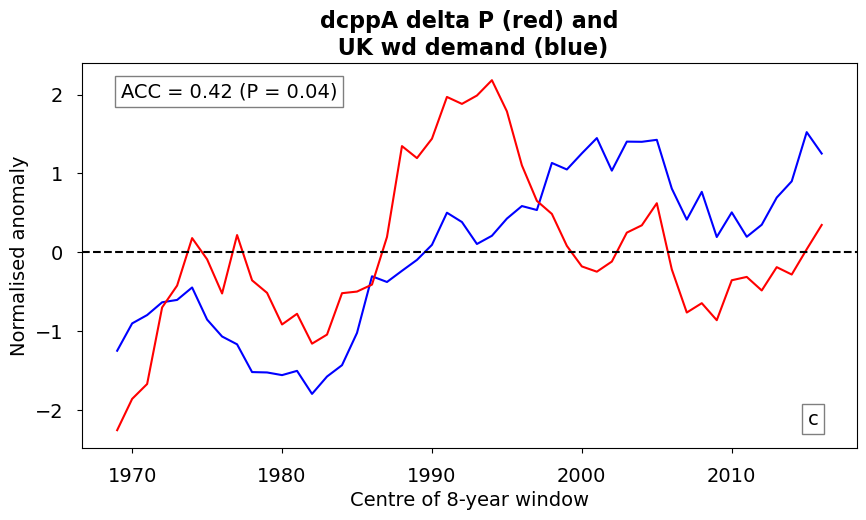

In [19]:
# Test the plotting function
funcs.plot_time_series(
    df=combined_df,
    predictor_col_name="model_nao_mean",
    predictand_col_name="UK_wd_demand",
    ylabel="Normalised anomaly",
    figsize_x=10,
    figsize_y=5,
    twin_axes=False,
    do_detrend_predictor=False,
    do_detrend_predictand=False,
    normalise_anom=True,
    title="dcppA delta P (red) and\n UK wd demand (blue)",
    label="c",
    fontsize=14,
    predictor_color="r",
    predictand_color="b",
    inverse_predictand=True,
    # manual_ylims=[-3.0, 3.0],
    calc_rmse=False,
    include_trendline=False,
    fix_predictor_trendline=False,
    resample_time=False, # for two obs datasets
    resample_time_members=True, # for one model, one obs dataset
    region="delta_p",
    season="ONDJFM",
    forecast_range="2-9",
    start_year="1961",
    end_year="2014",
    lag="4",
    variable="psl",
    alt_lag="alt-lag",
    region_full="global",
)

In [29]:
combined_df.head()

,AT,AL,BY,BE,BA,BG,HR,CZ,DK,EE,...,TR,UA,UK,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa),UK_wd_demand
1969,0.078306,0.101501,0.049124,0.057792,0.087872,0.093242,0.085288,0.061970,0.043523,0.037683,...,0.116051,0.065160,0.047340,1964,-354.681580,-267.841253,-439.194590,-96.487916,-348.860190,42.727389
1970,0.078260,0.101770,0.049867,0.057464,0.087971,0.093242,0.085262,0.062003,0.043822,0.037886,...,0.116315,0.066287,0.047171,1965,-215.043700,-276.476331,-447.829668,-105.122993,-209.222450,42.623879
1971,0.078060,0.102313,0.049081,0.057129,0.087898,0.093418,0.085050,0.061603,0.044408,0.037849,...,0.116203,0.065653,0.046845,1966,-203.877410,-284.130047,-455.483384,-112.776710,-198.056168,42.592295
1972,0.077762,0.102614,0.049431,0.057680,0.087762,0.092696,0.084961,0.061135,0.044790,0.038438,...,0.116533,0.065922,0.046656,1967,-147.214690,-191.507105,-362.860442,-20.153768,-141.393485,42.543972
1973,0.077965,0.103176,0.048114,0.057623,0.088482,0.093500,0.085181,0.061053,0.044106,0.037831,...,0.118209,0.065139,0.046793,1968,-3.761232,-181.768159,-353.121496,-10.414822,2.060024,42.535026


In [47]:
importlib.reload(funcs)

<module 'functions_em' from '/home/users/benhutch/energy-met-corr-functions/functions_em.py'>

In [30]:
combined_df_subset.head()

,UK_wd_demand,model_nao_mean
1969,42.727389,-267.841253
1970,42.623879,-276.476331
1971,42.592295,-284.130047
1972,42.543972,-191.507105
1973,42.535026,-181.768159


In [13]:
# new column for model_nao_mean / 100
merged_df_delta_p["model_nao_mean_hpa"] = merged_df_delta_p["model_nao_mean"] / 100

In [12]:
merged_df_delta_p.head()

,AT,AL,BY,BE,BA,BG,HR,CZ,DK,EE,...,CH,TR,UA,UK,init_time,obs_nao,model_nao_mean,model_nao_members_min,model_nao_members_max,NAO anomaly (Pa)
1969,0.078306,0.101501,0.049124,0.057792,0.087872,0.093242,0.085288,0.061970,0.043523,0.037683,...,0.090253,0.116051,0.065160,0.047340,1964,-190.44958,-232.656768,-318.234643,-147.078892,-348.860190
1970,0.078260,0.101770,0.049867,0.057464,0.087971,0.093242,0.085262,0.062003,0.043822,0.037886,...,0.089899,0.116315,0.066287,0.047171,1965,-110.93028,-192.618070,-278.195945,-107.040195,-209.222450
1971,0.078060,0.102313,0.049081,0.057129,0.087898,0.093418,0.085050,0.061603,0.044408,0.037849,...,0.089851,0.116203,0.065653,0.046845,1966,-105.87212,-173.565836,-259.143711,-87.987961,-198.056168
1972,0.077762,0.102614,0.049431,0.057680,0.087762,0.092696,0.084961,0.061135,0.044790,0.038438,...,0.090079,0.116533,0.065922,0.046656,1967,-114.52344,-75.626209,-161.204084,9.951667,-141.393485
1973,0.077965,0.103176,0.048114,0.057623,0.088482,0.093500,0.085181,0.061053,0.044106,0.037831,...,0.089654,0.118209,0.065139,0.046793,1968,-44.35204,-47.700463,-133.278338,37.877413,2.060024


r = 0.53, p = 0.00
Figure saved to: /gws/nopw/j04/canari/users/benhutch/plots/NAO_Solar_scatter_plot_20241118_100629.pdf


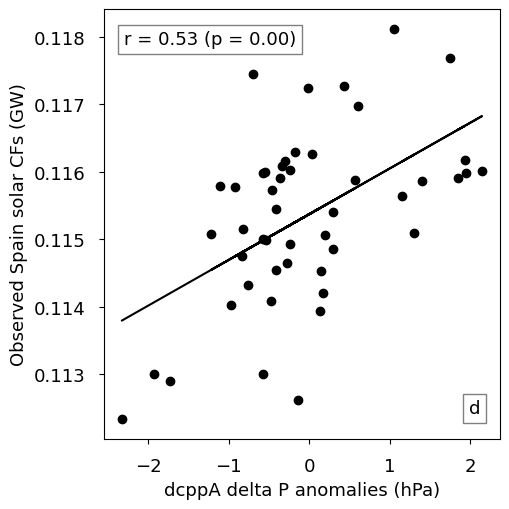

In [15]:
# test the new plot scatter function
funcs.plot_scatter(
    df=merged_df_delta_p,
    predictor_col_name="model_nao_mean_hpa",
    predictand_col_name="ES",
    predictor_var_name="NAO",
    predictand_var_name="Solar",
    xlabel="dcppA delta P anomalies (hPa)",
    ylabel="Observed Spain solar CFs (GW)",
    figsize=(5.2, 5.2),
    label="d",
    do_detrend_predictor=False,
    do_detrend_predictand=False,
    show_eqn_r_p=True,
    fontsize=13,
    fix_predictor_trendline=False,
    normalise_anom=False,
    inverse_predictand=False,
)

In [ ]:
from scipy.stats import pearsonr

# Create a plot with two y-axes
# Time on the x-axes
# The variable on the left y-axes is the NAO anomaly (Pa)
# The variable on the right y-axes is the wind power (GW) for N_Europe
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the NAO anomaly
ax1.plot(filtered_df.index, filtered_df.model_nao_mean / 100, "b-")

# Set the x-axis label
ax1.set_xlabel("Time")

# Set the y-axis label
ax1.set_ylabel("Hindcast NAO anomaly (hPa)", color="b")

# Include a black dashed line for y=0
ax1.axhline(0, color="black", linestyle="--")

# Set the color of the ticks
ax1.tick_params("y", colors="b")

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the wind power
ax2.plot(merged_df_full.index, merged_df_full.ES, "r-")

# Set the y-axis label
ax2.set_ylabel("Spain solar CFs", color="r")

# Set the colour of the ticks
ax2.tick_params("y", colors="r")

# # Invert the y-axis
# ax2.invert_yaxis()

# Calculate the correlation between the NAO anomaly and the wind power
corr, p = pearsonr(merged_df_full.model_nao_mean, merged_df_full.ES)

# Include the correlation and p-value on the plot
ax2.text(
    0.05,
    0.95,
    f"Correlation: {corr:.2f}\nP-value: {p:.2f}",
    horizontalalignment="left",
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.5),
    transform=ax2.transAxes,
)

# Show the plot
plt.show()

In [ ]:
merged_df_full.head()

In [ ]:
combined_df_subset.head()

In [ ]:
merged_df_nao_pr.head()

In [ ]:
from scipy.stats import linregress

# Plot a scatter plot of NAO agaist wind power
plt.figure(figsize=(8, 8))

# Plot the scatter plot
plt.scatter(merged_df_nao_pr["model_nao_mean"] / 100, merged_df_nao_pr["var228 anomaly mean"] * 1000, color="k")

# Include a line of best fit
slope, intercept, r_value, p_value, std_err = linregress(
    merged_df_nao_pr["model_nao_mean"] / 100, merged_df_nao_pr["var228 anomaly mean"] * 1000
)

# Plot the line of best fit
plt.plot(
    merged_df_nao_pr["model_nao_mean"] / 100,
    slope * (merged_df_nao_pr["model_nao_mean"] / 100) + intercept,
    color="k",
)

# Show the values
if intercept < 0:
    equation = f"y = {slope:.2f}x - {abs(intercept):.3f}"
else:
    equation = f"y = {slope:.2f}x + {intercept:.3f}"

# plt.text(
#     0.05,
#     0.95,
#     f"{equation}\nr={r_value:.2f}, p={p_value:.2f}",
#     horizontalalignment="left",
#     verticalalignment="top",
#     transform=plt.gca().transAxes,
#     bbox=dict(facecolor="white", alpha=0.5),
# )

# Set the x-axis label
plt.xlabel("dcpp-A NAO index anomalies (hPa)", color="k", fontsize=14)

# Set the xticks to blue
plt.tick_params(axis="x", colors="k")

# Set the y-axis label
plt.ylabel("Observed Scandinavia precip anomalies (mm/day)", color="k", fontsize=14)

# Include a textbox in the bottom right
plt.text(
    0.95,
    0.05,
    f"d",
    fontsize=12,
    transform=plt.gca().transAxes,
    verticalalignment="bottom",
    horizontalalignment="right",
    bbox=dict(facecolor="white", alpha=0.5),
)

# Set the yticks to red
plt.tick_params(axis="y", colors="k")

# save this as a pdf
filename = "scatter_dcpp-A_NAO_ERA5_scandi_precip_scatter.pdf"
dir = "/gws/nopw/j04/canari/users/benhutch/plots/"

# Save the figure
plt.savefig(f"{dir}{filename}",dpi=600)

In [ ]:
# Set up a dataframe to store the values
df = pd.DataFrame(
    {
        "slope": [slope],
        "intercept": [intercept],
        "r_value": [r_value],
        "p_value": [p_value],
        "std_err": [std_err],
    }
)

# Set up a filename for the dataframe
dir = "/home/users/benhutch/energy-met-corr/coeffs"

# If the directory does not exist, create it
if not os.path.exists(dir):
    os.makedirs(dir)

# Set up the filename
fname = "obs_nao_obs_solar_cfs_slope.csv"

# set up the full path
fpath = os.path.join(dir, fname)

# Save the datafram
df.to_csv(fpath)

In [ ]:
# Load in the ERA5 data for the NAO index
# Use this file
# adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc
# in ~/ERA5/
# Load the dataset
era5_data_path = "~/ERA5/adaptor.mars.internal-1691509121.3261805-29348-4-3a487c76-fc7b-421f-b5be-7436e2eb78d7.nc"

# Load the data into chunks
ds_era5 = xr.open_mfdataset(
    era5_data_path,
    combine="by_coords",
    parallel=True,
    chunks={"time": 100, "latitude": 100, "longitude": 100},
)[
    "msl"
]  # for mean sea level pressure

# Combine the first two expver variables
obs_msl = ds_era5.sel(expver=1).combine_first(ds_era5.sel(expver=5))

In [ ]:
# Constrain obs to ONDJFM
obs_msl = obs_msl.sel(time=obs_msl.time.dt.month.isin([10, 11, 12, 1, 2, 3]))

# Shift the time index back by 3 months
obs_msl_shifted = obs_msl.shift(time=-3)

# Take annual means
obs_msl_annual = obs_msl_shifted.resample(time="Y").mean()

# Throw away years 1959, 2021, 2022 and 2023
obs_msl_annual = obs_msl_annual.sel(time=slice("1960", "2019"))

# Remove the climatology
obs_msl_anomaly = obs_msl_annual - obs_msl_annual.mean(dim="time")

In [ ]:
# Extract the lats and lons of the azores
lat1, lat2 = dicts.era5_azores["lat1"], dicts.era5_azores["lat2"]
lon1, lon2 = dicts.era5_azores["lon1"], dicts.era5_azores["lon2"]

# Calculate the mean for the azores gridbox
obs_msl_anomaly_azores = obs_msl_anomaly.sel(
    latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)
).mean(dim=["latitude", "longitude"])

In [ ]:
# Same for iceland
lat1, lat2 = dicts.era5_iceland["lat1"], dicts.era5_iceland["lat2"]
lon1, lon2 = dicts.era5_iceland["lon1"], dicts.era5_iceland["lon2"]

# Calculate the mean for the iceland gridbox
obs_msl_anomaly_iceland = obs_msl_anomaly.sel(
    latitude=slice(lat1, lat2), longitude=slice(lon1, lon2)
).mean(dim=["latitude", "longitude"])

In [ ]:
# Calculate the NAO index (azores - iceland)
nao_index = obs_msl_anomaly_azores - obs_msl_anomaly_iceland

In [ ]:
# EXtract the time series
nao_index_time = nao_index.time.values

# Extract the values
nao_index_values = nao_index.values

# Create a dataframe
nao_df = pd.DataFrame({"time": nao_index_time, "value": nao_index_values})

# Take a centred 8-year running mean
nao_running = nao_df.set_index("time").rolling(8, center=True).mean()

In [ ]:
# Have a look at the dataframe
nao_running.head()

In [ ]:
# Drop the NaN values
nao_running = nao_running.dropna()

In [ ]:
# Combine the two dataframes into one, using the index of the first
eez_df = eez_cfs.join(nao_running, how="inner")

In [ ]:
eez_df.head()

In [ ]:
# Rename the value column as 'NAO anomaly (Pa)'
eez_df = eez_df.rename(columns={"value": "NAO anomaly (Pa)"})

In [ ]:
# Drop the rows which contain NaN values in the NAO anomaly column
eez_df = eez_df.dropna()

In [ ]:
eez_df.head()

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Create a new dataframe with columns for:
# 'region' - e.g. Netherlands_7
# 'correlation' - the correlation between the NAO and the offshore wind CFs
# 'p-value' - the p-value of the correlation
# Set up the dataframe
correlation_df = pd.DataFrame(columns=["region", "correlation", "p-value"])

# Loop over the regions
for region in eez_df.columns[:-1]:
    # Calculate the correlation
    corr, p = pearsonr(eez_df[region], eez_df["NAO anomaly (Pa)"])

    # Create a new DataFrame to append
    df_to_append = pd.DataFrame(
        {"region": [region], "correlation": [corr], "p-value": [p]}
    )

    # Append to the dataframe
    correlation_df = pd.concat([correlation_df, df_to_append], ignore_index=True)

In [ ]:
correlation_df.head()

In [ ]:
# Remove the numbers from the region column by removing the last 2 characters
correlation_df["region"] = correlation_df["region"].str

In [ ]:
correlation_df

In [ ]:
# if any of the region names contain the string "_" then remove it
correlation_df["region"] = correlation_df["region"].str.replace("_", " ")

In [ ]:
correlation_df.head()

In [ ]:
EEZ_shapefile["SOVEREIGN1"]

In [ ]:
# Create two new columns in the geopandas dataframe 'EEZ_shapefile'
# 'correlation' - the correlation between the NAO and the offshore wind CFs
# 'p-value' - the p-value of the correlation
EEZ_shapefile["correlation"] = np.nan
EEZ_shapefile["p-value"] = np.nan

In [ ]:
EEZ_shapefile.head()

In [ ]:
# Loop over the regions in correlation_df
for region in correlation_df["region"]:
    # Extract the row from correlation_df
    row = correlation_df[correlation_df["region"] == region]

    # Extract the correlation and p-value
    corr = row["correlation"].values[0]
    p = row["p-value"].values[0]

    # Set the values in the EEZ_shapefile
    EEZ_shapefile.loc[EEZ_shapefile["TERRITORY1"] == region, "correlation"] = corr
    EEZ_shapefile.loc[EEZ_shapefile["TERRITORY1"] == region, "p-value"] = p

In [ ]:
EEZ_shapefile["TERRITORY1"] == "France", "correlation"

In [ ]:
# Extract the list of Terrirories
territories = EEZ_shapefile["TERRITORY1"]

# Convert to a list
territories = list(territories)

# Print the territories
print(territories)

In [ ]:
# Constrain EEZ shapefile to only include the territories in the list
EEZ_shapefile = EEZ_shapefile[EEZ_shapefile["TERRITORY1"].isin(dicts.countries_list)]

In [ ]:
# Print the correlation values for FRance
print(EEZ_shapefile[EEZ_shapefile["SOVEREIGN1"] == "France"]["correlation"])

In [ ]:
# Import cartopy
import cartopy.crs as ccrs

# Now plot the EEZ_shapefile with the correlation as the color
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
EEZ_shapefile.plot(
    column="correlation", ax=ax, legend=True, cmap="coolwarm", shrink=0.5
)
# Use cartopy to add the coastlines
ax.coastlines()
# Make the colorbar smaller
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel("Correlation", fontsize=12)
cbar.tick_params(labelsize=10)

# Constrain to specific bounds
ax.set_xlim(-50, 50)
ax.set_ylim(30, 80)

In [ ]:
# Now plot the EEZ_shapefile with the correlation as the color
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": ccrs.PlateCarree()})
cax = EEZ_shapefile.plot(
    column="correlation", ax=ax, cmap="coolwarm", add_colorbar=False
)

# Use cartopy to add the coastlines
ax.coastlines()

# Add colorbar
cbar = fig.colorbar(cax.collections[0], ax=ax, shrink=0.5)
cbar.set_label("Correlation")

# Constrain to specific bounds
ax.set_xlim(-50, 50)
ax.set_ylim(30, 80)